In [306]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification,load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [307]:
x,y=make_classification(n_classes=2,n_samples=1000,n_features=2,n_clusters_per_class=1,random_state=3,n_informative=2,n_redundant=0)

In [308]:
y[y==0]=-1

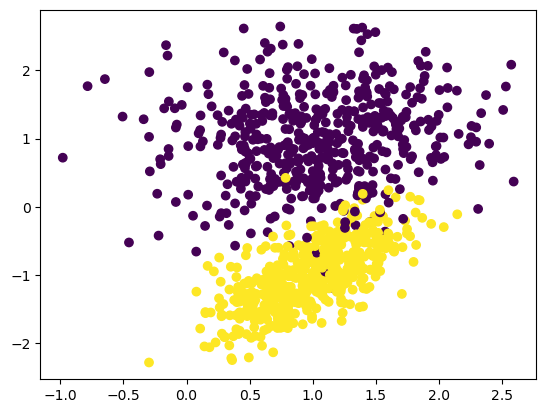

In [309]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [310]:
class SVM:
    def __init__(self,c=1):
        self.c=c
        self.b=0
        self.w=[]

    def hyperplane(self):
        return self.w,self.b

    def hinge_loss(self,x_train,y_train):
        loss=0
        loss+=np.dot(self.w,self.w.T)/2
        for i in range(x_train.shape[0]):
            ti=y[i]*(np.dot(self.w,x[i].T)+self.b)
            loss+=self.c*max(0,1-ti)
        return loss

    def gradient_descent(self,x_train,y_train,batch_size,iter,lr):
        losses=[]
        for i in range(iter):
            # for j in range(x_train.shape[0]):
            #     ti=y[j]*(np.dot(self.w,x[j].T)+self.b)
            #     dw=np.sum(self.w)
            #     db=0
            #     if ti<1:
            #         dw+=-1*self.c*y_train[j]*x_train[j]
            #         db-=y_train[j]
            #     if j%batch_size==0:
            #         self.w=self.w-lr*dw
            #         self.b=self.b-lr*db
            #         self.hinge_loss(x_train,y_train)
            ids=np.arange(x_train.shape[0])
            np.random.shuffle(ids)
            for batch_start in range(0,x_train.shape[0],batch_size):
                dw=np.sum(self.w)
                db=0
                for j in range(batch_start,batch_start+batch_size):
                    if j<x_train.shape[0]:
                        i=ids[j]
                        ti=y_train[i]*(np.dot(self.w,x_train[i].T)+self.b)
                        if ti<1:
                            dw-=self.c*y_train[i]*x_train[i]
                            db-=y_train[i]
                self.w=self.w-lr*dw
                self.b=self.b-lr*db
                # print(self.hinge_loss(x_train,y_train))
            losses.append(self.hinge_loss(x_train,y_train))
        return losses

    def predict(self,x_test):
        predictions=[]
        for x in x_test:
            predictions.append(1 if (np.dot(self.w,x.T)+self.b)>0 else -1)
        return predictions
    
    def fit(self,x_train,y_train,batch_size=100,iter=500,lr=0.002):
        feature_size=x_train.shape[1]
        self.w=np.zeros(feature_size)
        self.b=0
        return self.gradient_descent(x_train,y_train,batch_size,iter,lr),self.w,self.b

In [311]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [312]:
clf=SVM(1)
losses,w,b=clf.fit(x_train,y_train)

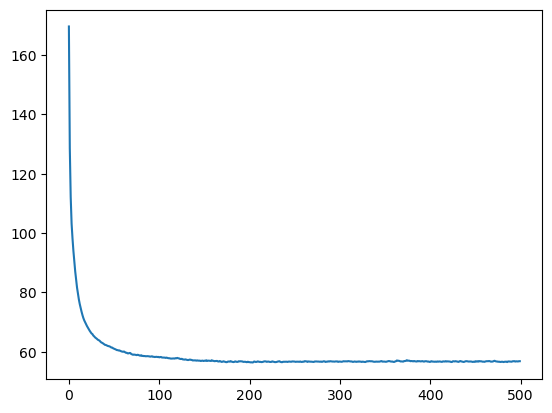

In [313]:
plt.plot(losses)
plt.show()

In [314]:
def plot_hyperplane(w1,w2,b):
    x_1=np.linspace(-1,3,10)
    x_2=-(w1*x_1+b)/w2
    x_p=-(w1*x_1+b+1)/w2
    x_n=-(w1*x_1+b-1)/w2
    plt.plot(x_1,x_2,label="wTx+b=0")
    plt.plot(x_1,x_p,"g-.",label="wTx+b=1")
    plt.plot(x_1,x_n,"g-.",label="wTx+b=-1")
    plt.legend()
    plt.yticks(np.arange(-2,2,0.5))
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.show()

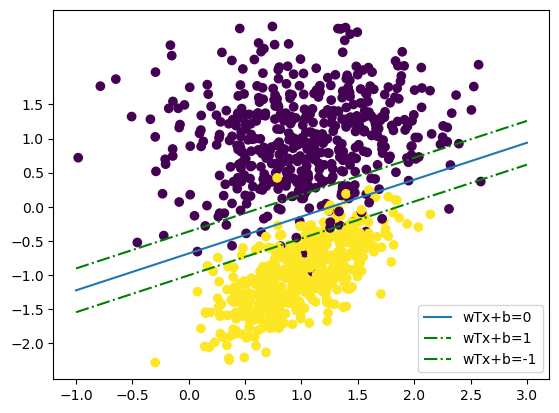

In [315]:
plot_hyperplane(w[0],w[1],b)

In [316]:
y_pred=clf.predict(x_test)

In [317]:
print(confusion_matrix(y_test,y_pred))

[[108   8]
 [  2 132]]


In [318]:
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target

In [319]:
x.shape

(569, 30)

In [320]:
y[y==0]=-1
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [321]:
clf=SVM()
losses,w,b=clf.fit(x_train,y_train)

In [322]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.83      0.89        53
           1       0.91      0.98      0.94        90

    accuracy                           0.92       143
   macro avg       0.93      0.90      0.92       143
weighted avg       0.93      0.92      0.92       143

[[44  9]
 [ 2 88]]
